In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
filename = '../data/sst/2014/20140101120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.1-v02.0-fv01.0.nc'
data = Dataset(filename, 'r')
print(data.variables.keys())
print(data.variables['analysed_sst'].units)
print(data.variables['lat'].units)
print(data.variables['lon'].units)
print(data.variables['time'])

dict_keys(['analysed_sst', 'lat', 'lon', 'mask', 'sea_ice_fraction', 'time', 'analysed_sst_uncertainty', 'time_bnds', 'lat_bnds', 'lon_bnds'])
kelvin
degrees_north
degrees_east
<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: reference time of sst field
    standard_name: time
    axis: T
    units: seconds since 1981-01-01 00:00:00
    calendar: gregorian
    bounds: time_bnds
    comment: 
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of -2147483647 used


In [6]:
sst = data.variables['analysed_sst'][0][:]
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
time = data.variables['time'][:]
units_sst = data.variables['analysed_sst'].units
units_lat = data.variables['lat'].units
units_lon = data.variables['lon'].units

print(f"Unidades de temperatura {units_sst}, \n {units_lat}, {units_lon}")
print(f"Dimensiones de la matriz de temperatura {sst.shape}, \n {lat.shape}, {lon.shape}")

Unidades de temperatura kelvin, 
 degrees_north, degrees_east
Dimensiones de la matriz de temperatura (3600, 7200), 
 (3600,), (7200,)


In [15]:
latbound = [ 25.933687, 51.25798 ]
lonbound = [ -158.980523, -114.42687 ]

In [16]:
# Seleccionar la región de interés

import numpy as np
lat_lb = np.argmin(np.abs(lat - latbound[0]))
lat_ub = np.argmin(np.abs(lat - latbound[1]))
lon_lb = np.argmin(np.abs(lon - lonbound[0]))
lon_ub = np.argmin(np.abs(lon - lonbound[1]))

lat_subset = lat[lat_lb:lat_ub]
lon_subset = lon[lon_lb:lon_ub]
sst_subset = sst[lat_lb:lat_ub, lon_lb:lon_ub]

print(f"Dimensiones de la matriz de temperatura {sst_subset.shape}")


Dimensiones de la matriz de temperatura (507, 891)


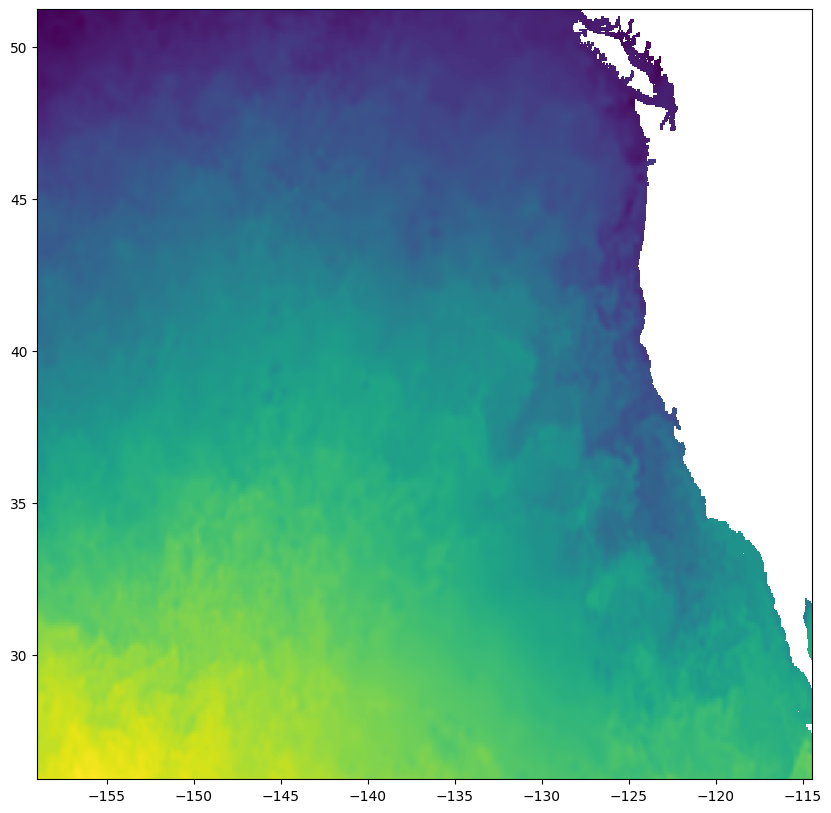

In [19]:
plt.figure(figsize=(10, 10))
plt.pcolor(lon_subset, lat_subset, sst_subset,)